## 情感分析项目

本项目的目标是基于用户提供的评论，通过算法自动去判断其评论是正面的还是负面的情感。比如给定一个用户的评论：
- 评论1： “我特别喜欢这个电器，我已经用了3个月，一点问题都没有！”
- 评论2： “我从这家淘宝店卖的东西不到一周就开始坏掉了，强烈建议不要买，真实浪费钱”

对于这两个评论，第一个明显是正面的，第二个是负面的。 我们希望搭建一个AI算法能够自动帮我们识别出评论是正面还是负面。

情感分析的应用场景非常丰富，也是NLP技术在不同场景中落地的典范。比如对于一个证券领域，作为股民，其实比较关注舆论的变化，这个时候如果能有一个AI算法自动给网络上的舆论做正负面判断，然后把所有相关的结论再整合，这样我们可以根据这些大众的舆论，辅助做买卖的决策。 另外，在电商领域评论无处不在，而且评论已经成为影响用户购买决策的非常重要的因素，所以如果AI系统能够自动分析其情感，则后续可以做很多有意思的应用。 

情感分析是文本处理领域经典的问题。整个系统一般会包括几个模块：
- 数据的抓取： 通过爬虫的技术去网络抓取相关文本数据
- 数据的清洗/预处理：在本文中一般需要去掉无用的信息，比如各种标签（HTML标签），标点符号，停用词等等
- 把文本信息转换成向量： 这也成为特征工程，文本本身是不能作为模型的输入，只有数字（比如向量）才能成为模型的输入。所以进入模型之前，任何的信号都需要转换成模型可识别的数字信号（数字，向量，矩阵，张量...)
- 选择合适的模型以及合适的评估方法。 对于情感分析来说，这是二分类问题（或者三分类：正面，负面，中性），所以需要采用分类算法比如逻辑回归，朴素贝叶斯，神经网络，SVM等等。另外，我们需要选择合适的评估方法，比如对于一个应用，我们是关注准确率呢，还是关注召回率呢？ 

在本次项目中，我们已经给定了训练数据和测试数据，它们分别是 ``train.positive.txt``, ``train.negative.txt``， ``test_combined.txt``. 请注意训练数据和测试数据的格式不一样，详情请见文件内容。 整个项目你需要完成以下步骤：

数据的读取以及清洗： 从给定的.txt中读取内容，并做一些数据清洗，这里需要做几个工作： 
- （1） 文本的读取，需要把字符串内容读进来。 
- （2）去掉无用的字符比如标点符号，多余的空格，换行符等 
- （3） 把文本转换成``TF-IDF``向量： 这部分直接可以利用sklearn提供的``TfidfVectorizer``类来做。
- （4） 利用逻辑回归等模型来做分类，并通过交叉验证选择最合适的超参数

项目中需要用到的数据：
- ``train.positive.txt``, ``train.negative.txt``， ``test_combined.txt``： 训练和测试数据
- ``stopwords.txt``： 停用词库


你需要完成的部分为标记为`TODO`的部分。 

另外，提交作业时候的注意点：
> 1. 不要试图去创建另外一个.ipynb文件，所有的程序需要在`starter_code.ipynb`里面实现。很多的模块已经帮你写好，不要试图去修改已经定义好的函数以及名字。 当然，自己可以按需求来创建新的函数。但一定要按照给定的框架来写程序，不然判作业的时候会出现很多问题。 
> 2. 上传作业的时候把整个文件解压成.zip文件（不要.rar格式），请不要上传图片文件，其他的都需要上传包括`README.md`。
> 3. 确保程序能够正常运行，我们支持的环境是`Python 3`,  千万不要使用`Python 2`
> 4. 上传前一定要确保完整性，批改过一次的作业我们不会再重新批改，会作为最终的分数来对待。 
> 5. 作业可以讨论，但请自己完成。让我们一起遵守贪心学院的`honor code`。

### 1. File Reading: 文本读取 

In [33]:
from matplotlib import pyplot as plt
import jieba  # 分词
import re  # 正则
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def read_data(filename, positive=None):
    f = open(filename, 'r', encoding='utf-8')
    review_start = False
    review_text = []
    reviews = []
    labels = []
    for line in f.readlines():
        line = line.strip('\n')
        if not line:
            continue

        if not review_start and line.startswith("<review"):
            review_start = True
            if "label" in line:
                labels.append(int(line.split('"')[-2]))
            continue

        if review_start and line == "</review>":
            review_start = False
            reviews.append(" ".join(review_text))
            review_text = []
            continue

        if review_start:
            review_text.append(line)

    if positive:
        labels = [1] * len(reviews)
    elif not positive is None:
        labels = [0] * len(reviews)
    f.close()
    return reviews, labels

In [34]:
def process_file():
    """
    读取训练数据和测试数据，并对它们做一些预处理
    """
    train_pos_file = "data/train.positive.txt"
    train_neg_file = "data/train.negative.txt"
    test_comb_file = "data/test.combined.txt"
    # TODO: 读取文件部分，把具体的内容写入到变量里面
    train_comments = []
    train_labels = []
    test_comments = []
    test_labels = []

    train_comments, train_labels = read_data(train_pos_file, True)
    comments, labels = read_data(train_neg_file, False)
    train_comments = train_comments + comments
    train_labels = train_labels + labels
    test_comments, test_labels = read_data(test_comb_file)
    print(test_comments[0])    
    return train_comments,train_labels,test_comments,test_labels

train_comments,train_labels,test_comments,test_labels = process_file()
# print(test_labels)

我终于找到同道中人啦～～～～从初中开始，我就已经喜欢上了michaeljackson.但同学们都用鄙夷的眼光看我，他们人为jackson的样子古怪甚至说＂丑＂．我当场气晕．但现在有同道中人了，我好开心！！！michaeljacksonisthemostsuccessfulsingerintheworld!!~~~


In [35]:
train_pos_file = "data/train.positive.txt"
open(train_pos_file)

<_io.TextIOWrapper name='data/train.positive.txt' mode='r' encoding='cp936'>

In [36]:
print(train_comments[1],train_labels[1])
print(test_comments[0],test_labels[0])

print(len(train_comments),len(train_labels))
print(len(test_comments),len(test_labels))

手感超好，而且黑色相比白色在转得时候不容易眼花，找童年的记忆啦。 1
我终于找到同道中人啦～～～～从初中开始，我就已经喜欢上了michaeljackson.但同学们都用鄙夷的眼光看我，他们人为jackson的样子古怪甚至说＂丑＂．我当场气晕．但现在有同道中人了，我好开心！！！michaeljacksonisthemostsuccessfulsingerintheworld!!~~~ 0
8064 8064
2500 2500


### 2. Explorary Analysis: 做一些简单的可视化分析

In [37]:
# 训练数据和测试数据大小
print (len(train_comments), len(test_comments))

8064 2500


> 这里有一个假设想验证。我觉得，如果一个评论是负面的，则用户留言时可能会长一些，因为对于负面的评论，用户很可能会把一些细节写得很清楚。但对于正面的评论，用户可能就只写“非常好”，这样的短句。我们想验证这个假设。 为了验证这个假设，打算画两个直方图，分别对正面的评论和负面的评论。 具体的做法是：1. 把正面和负面评论分别收集，之后分别对正面和负面评论画一个直方图。 2.  直方图的X轴是评论的长度，所以从是小到大的顺序。然后Y轴是对于每一个长度，出现了多少个正面或者负面的评论。 通过两个直方图的比较，即可以看出``评论``是否是一个靠谱的特征。


4999 3065


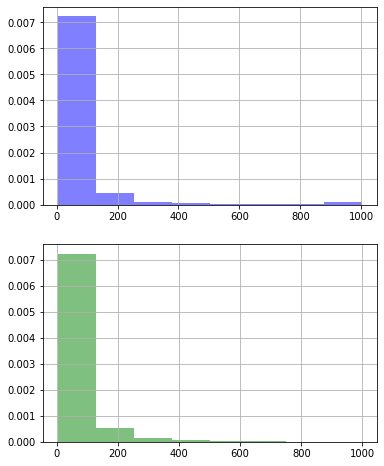

In [38]:
# TODO: 对于训练数据中的正负样本，分别画出一个histogram， histogram的x抽是每一个样本中字符串的长度，y轴是拥有这个长度的样本的百分比。
#       并说出样本长度是否对情感有相关性 (需要先用到结巴分词)
#       参考: https://baike.baidu.com/item/%E7%9B%B4%E6%96%B9%E5%9B%BE/1103834?fr=aladdin
#       画饼状图参考: https://pythonspot.com/matplotlib-histogram/
#                   https://matplotlib.org/3.1.1/ap/_as_gen/matplotlib.pyplot.hist.html
len_pos = [len(str) for i, str in enumerate(train_comments) if train_labels[i] == 1]
len_neg = [len(str) for i, str in enumerate(train_comments) if train_labels[i] == 0]
print(len(len_pos), len(len_neg))

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 8))  #规定画布的大小
plt.subplot(2, 1, 1)
num_bins = 8
plt.hist(len_pos, num_bins, facecolor='blue', alpha=0.5, density=True)
plt.grid(True)
plt.subplot(2, 1, 2)
plt.hist(len_neg, num_bins, facecolor='green', alpha=0.5, density=True)
plt.grid(True)
plt.show()

// TODO: 情感跟评论长度是否有相关性？

// 你的答案:不相关


### 3. 文本预处理
> 在此部分需要做文本预处理方面的工作。 分为几大块：
- ``去掉特殊符号``  比如#$.... 这部分的代码已经给出，不需要自己写
- ``把数字转换成特殊单词`` 把数字转换成 " NUM "， 这部分需要写。 注意：NUM前面和后面加一个空格，这样可以保证之后分词时被分掉。
- ``分词并过滤掉停用词`` 停用词库已经提供，需要读取停用词库，并按照此停用词库做过滤。 停用词库使用给定的文件：``stopwords.txt`` 

In [39]:
def clean_symbols(text):
    """
    对特殊符号做一些处理，此部分已写好。如果不满意也可以自行改写，不记录分数。
    """
    #text = re.sub('[!！]+', "!", text)
    #text = re.sub('[?？]+', "?", text)
    #text = re.sub('[~~ ]+', "~", text)
    text = re.sub('[!！]+', " ", text)
    text = re.sub('[?？]+', " ", text)
    text = re.sub('[~~ ]+', " ", text)
    text = re.sub('[～～ ]+', " ", text)
    text = re.sub("[a-zA-Z#$%&\'()*+,-./:;：<=>@，。★、…【】《》“”‘’[\\]^_`{|}~]+"," ", text)
    return re.sub("\s+", " ", text)


def load_file(file):
    content = []
    with open(file, 'r', encoding="utf-8") as f:
        for line in file:
            content += line.strip()
    return content


def replace_num(text):
    return re.sub("\d+", ' NUM ', text)


def process_text(text, stopwords):
    text = clean_symbols(text)
    text = replace_num(text)
    text = " ".join([term for term in jieba.cut(text) if term and not term in stopwords])
    return text


# TODO：对于train_comments, test_comments进行字符串的处理，几个考虑的点：
#   1. 去掉特殊符号
#   2. 把数字转换成特殊字符或者单词
#   3. 分词并做停用词过滤
#   4. ... （或者其他）
#
#   需要注意的点是，由于评论数据本身很短，如果去掉的太多，很可能字符串长度变成0
#   预处理部分，可以自行选择合适的方.
stopwords = load_file("data/stopwords.txt")
train_comments_cleaned = [process_text(text, stopwords) for text in train_comments]
test_comments_cleaned = [process_text(text, stopwords) for text in test_comments]

In [47]:
# 打印一下看看
# print (train_comments_cleaned[0], test_comments_cleaned[0])
# print (train_comments_cleaned[1], test_comments_cleaned[1])
print(test_comments_cleaned[0])

我 终于 找到 同道中人 啦   从 初中 开始   我 就 已经 喜欢 上 了   但 同学 们 都 用 鄙夷 的 眼光 看 我   他们 人为   的 样子 古怪 甚至 说 ＂ 丑 ＂ ． 我 当场 气晕 ． 但 现在 有 同道中人 了   我 好开心  


### 4. 把文本转换成向量
> 预处理好文本之后，我们就需要把它转换成向量形式，这里我们使用tf-idf的方法。 sklearn自带此功能，直接调用即可。输入就是若干个文本，输出就是每个文本的tf-idf向量。详细的使用说明可以在这里找到： 参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html  这里需要特别注意的一点是：对于训练数据调用fit_transform, 也就是训练的过程。 但对于测试数据，不能再做训练，而是直接使用已经训练好的object做transform操作。思考一下为什么要这么做？


In [46]:
# TODO: 利用tf-idf从文本中提取特征,写到数组里面. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

#       参考：
tfidf_model = TfidfVectorizer().fit(train_comments_cleaned)
X_train =  tfidf_model.transform(train_comments_cleaned)# 训练数据的特征
y_train =  train_labels# 训练数据的label
X_test =   tfidf_model.transform(test_comments_cleaned)# 测试数据的特征
y_test =   test_labels# 测试数据的label

# print(X_train[0],y_train[0])
# print(X_train[0][0][0])
print(X_test[0])
print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

  (0, 17764)	0.18868626709504846
  (0, 16579)	0.2830530819427771
  (0, 15770)	0.20983214458517935
  (0, 15650)	0.1376302312170629
  (0, 14085)	0.3181253524378206
  (0, 13469)	0.21898375226703318
  (0, 10907)	0.21544048219177275
  (0, 9562)	0.27884142280477353
  (0, 9323)	0.17548816349598256
  (0, 8878)	0.1507027634532857
  (0, 7667)	0.3181253524378206
  (0, 6295)	0.11051076639000804
  (0, 5766)	0.22829089639998063
  (0, 5442)	0.3181253524378206
  (0, 4188)	0.307838481985474
  (0, 2312)	0.17824011899080325
  (0, 2114)	0.3181253524378206
(8064, 23328) (2500, 23328) (8064,) (2500,)


### 5. 通过交叉验证来训练模型
> 接下来需要建模了！ 这里我们分别使用逻辑回归，朴素贝叶斯和SVM来训练。针对于每一个方法我们使用交叉验证（gridsearchCV)， 并选出最好的参数组合，然后最后在测试数据上做验证。 这部分已经在第二次作业中讲过。

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C
params_c = np.logspace(-1, 1, 20)  #1.43
print(params_c)
param_grid = [{'C': params_c}]
grid_model = GridSearchCV(LogisticRegression(penalty="l2"),
                          cv=3,
                          param_grid=param_grid,
                          scoring='f1',
                          n_jobs=-1)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
predictions = grid_model.predict(X_test)
print(predictions)
print(classification_report(y_test, predictions))

[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]
{'C': 1.1288378916846888}
[1 1 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1250
           1       0.67      0.92      0.77      1250

    accuracy                           0.73      2500
   macro avg       0.77      0.73      0.72      2500
weighted avg       0.77      0.73      0.72      2500



D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn.naive_bayes import MultinomialNB
# TODO： 利用朴素贝叶斯来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       朴素贝叶斯的使用方法请参考：https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
#       对于朴素贝叶斯，一般不太需要超参数的调节。但如果想调参，也可以参考上面的链接，有几个参数是可以调节的。
clf = MultinomialNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.31      0.47      1250
           1       0.59      0.98      0.73      1250

    accuracy                           0.65      2500
   macro avg       0.76      0.65      0.60      2500
weighted avg       0.76      0.65      0.60      2500



In [36]:
from sklearn.svm import SVC
# TODO： 利用SVM来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel。 这里的参数C跟逻辑回归是一样的， gamma和kernel是针对于SVM的参数
#       在这里先不要考虑他们的含义（或者通过官方文档试图理解一下）， 在课程最后的部分会讲到这些内容。
params_c = [1,1.5,2,2.5,3,3.5,4,4.5,5]
param_grid = [
    {'C': params_c},
    {'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]},
    {'kernel':['linear', 'rbf']}
]
grid_model = GridSearchCV(SVC(),
                          cv=3,
                          param_grid=param_grid,
                          scoring='f1',
                          n_jobs=-1)
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
predictions = grid_model.predict(X_test)
print(classification_report(y_test, predictions))

{'gamma': 1}
              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1250
           1       0.67      0.92      0.77      1250

    accuracy                           0.73      2500
   macro avg       0.77      0.73      0.72      2500
weighted avg       0.77      0.73      0.72      2500



> 对于超参数的调整，我们经常使用gridsearch，这也是工业界最常用的方法，但它的缺点是需要大量的计算，所以近年来这方面的研究也成为了重点。 其中一个比较经典的成果为Bayesian Optimization（利用贝叶斯的思路去寻找最好的超参数）。Ryan P. Adams主导的Bayesian Optimization利用高斯过程作为后验概率（posteior distribution）来寻找最优解。 https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf 在下面的练习中，我们尝试使用Bayesian Optimization工具来去寻找最优的超参数。参考工具：https://github.com/fmfn/BayesianOptimization  感兴趣的朋友可以去研究一下。 

### 6. 思考题 
1. 对于情感分析来说，有一个问题也很重要，比如一个句子里出现了 “我不太兴奋”， “不是很满意”。 在这种情况，因为句子中出现了一些积极的词汇很可能被算法识别成正面的，但由于前面有一个“不”这种关键词，所以否定+肯定=否定，算法中这种情况也需要考虑。另外，否定+否定=肯定， 这种情况也一样。 
2. 另外一个问题是aspect-based sentiment analysis, 这个指的是做情感分析的时候，我们既想了解情感，也想了解特定的方面。 举个例子： “这部手机的电池性能不错，但摄像不够清晰啊!”, 分析完之后可以得到的结论是： “电池：正面， 摄像：负面”， 也就是针对于一个产品的每一个性能做判定，这种问题我们叫做aspect-based sentiment analysis，也是传统情感分析的延伸。

>``Q``: 对于如上两个问题，有什么解决方案？ 大概列一下能想到的处理方案。 用简介的文字来描述即可。  

// 你的答案在这里.......
1.可以单独考虑这类问题，把"不是很，不太。。。"这类词在分词的时候分到一块
2.遇到aspect-based sentiment analysis这类问题，可以单独搞一个中性类别，将原来的2分类问题转为3分类问题






<font color=#FF0000 size=4 face="黑体">对于该思考体关于多方面情感的问题，你可以多去博客先做简单了解，参考https://zhuanlan.zhihu.com/p/44580856</font>

### 7. 其他领域（仅供参考）
跟情感分析类似的领域有叫affective computing, 也就是用来识别情绪(emotion recognition)。但情感和情绪又不太一样，情绪指的是高兴，低落，失落，兴奋这些人的情绪。我们知道真正的人工智能是需要读懂人类的情绪的。而且情绪识别有很多场景，比如服务机器人根据不同的情绪来跟用户交流； 无人驾驶里通过识别用户的情绪（摄像头或者声音或者传感器）来保证安全驾驶； IOT领域里设备也需要读懂我们的情绪； 微博里通过文本读懂每个人发文时的情绪。 

总体来讲，情绪识别跟情感识别所用到的技术是类似的，感兴趣的小伙伴，也可以关注一下这个领域。 如果想发论文，强烈建议选择情绪方面的，不建议选择情感分析，因为问题太老了。情绪分析是近几年才开始受关注的领域。 